## Hotel Reservations Classificaton

* Goal: The primary objective is to predict hotel booking cancellations to mitigate revenue loss due to unoccupied rooms.

* Data: Our dataset contains detailed information about hotel bookings, including customer specifics and whether the booking was cancelled or not.

* Model: We aim to develop a binary classification model that can predict future booking cancellations accurately.

### Data Dictionary

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### 1. Importing Libraries

In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# Loading the data
df = pd.read_csv("data\Hotel Reservations.csv", encoding_errors="ignore")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
def data_summary(data):
    print("***************************************************")
    print("The Shape of the data: ", data.shape)
    print("***************************************************")
    print("The columns in data:", data.columns)
    print("***************************************************")
    print("The data statistical summary:", data.info())
    print("***************************************************")
    print("The null count in data: ", data.isnull().sum())
    print("***************************************************")

data_summary(df)

***************************************************
The Shape of the data:  (36275, 19)
***************************************************
The columns in data: Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')
***************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   

* We can observe that our data does not have any missing data.
* Our target variable is **booking_status**

## 2. EDA
### 2.1 Univariate Analysis

In [5]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# Separating Categorical and numerical data
cat_cols, num_cols = [], []

def seperate_cat_num_cols(data):
    for col in data.columns:
        if data[col].dtypes == "object":
            cat_cols.append(col)
        elif data[col].dtypes != "object":
            num_cols.append(col)
    print("Categorical Columns: ",cat_cols)
    print("Numerical Columns: ",num_cols)

seperate_cat_num_cols(df)

Categorical Columns:  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical Columns:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [7]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


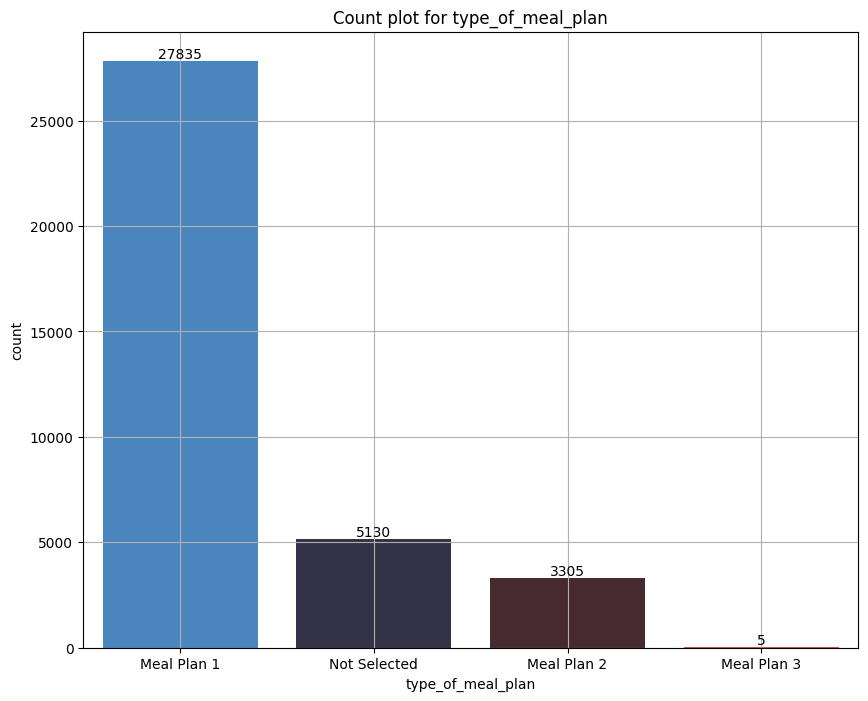

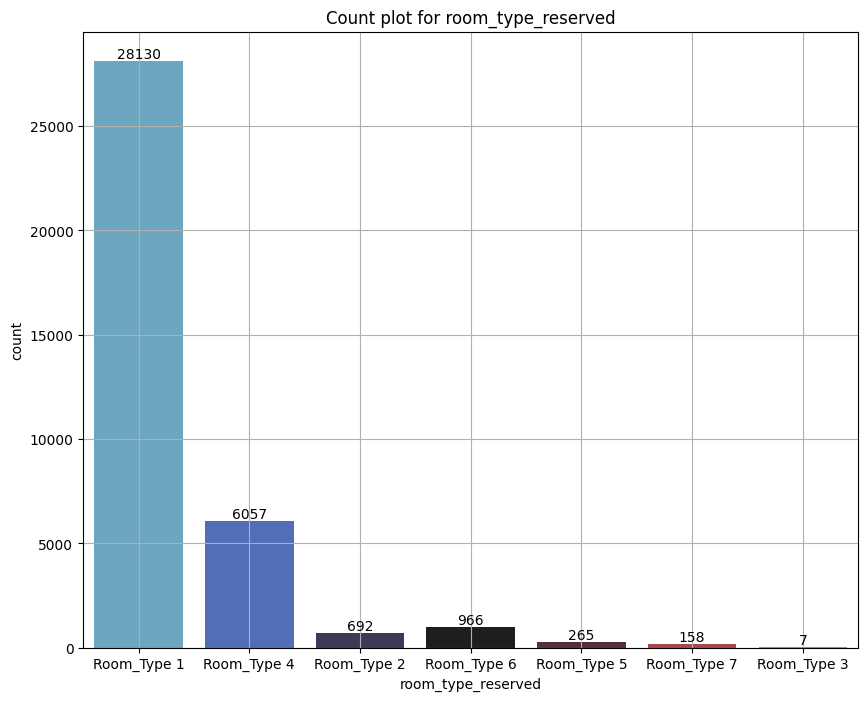

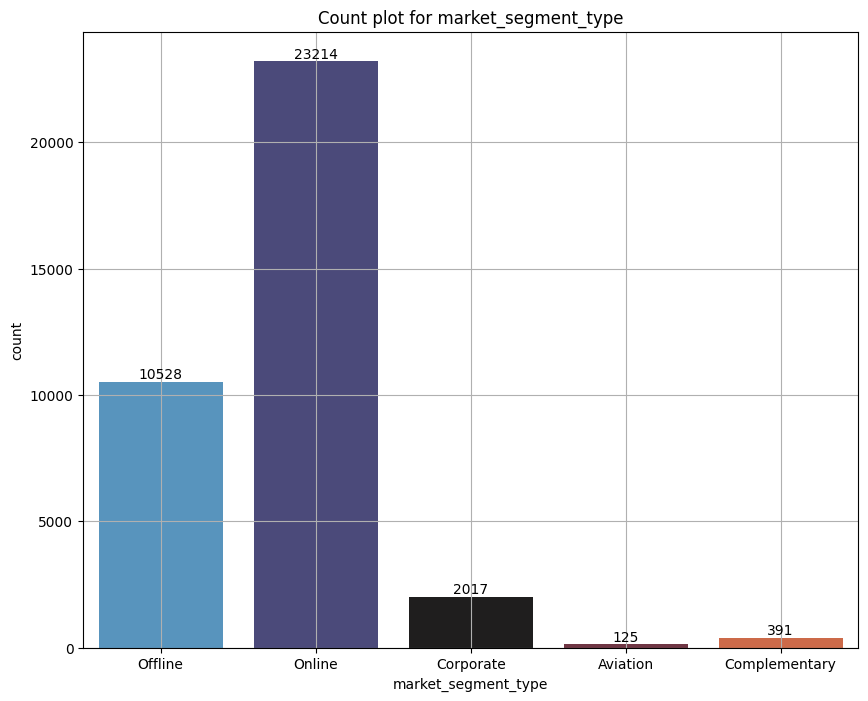

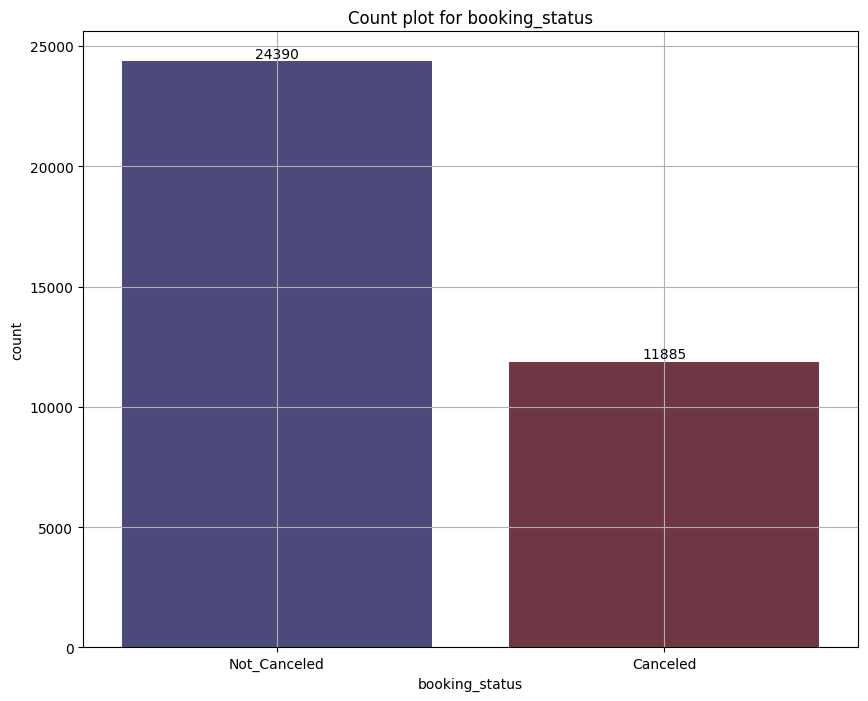

In [8]:
categorical_cols = cat_cols[1:] # We excluded Booking_ID column as it has all unique id for bookings
for col in categorical_cols:
    plt.figure(figsize=[10,8])
    ax = sns.countplot(data=df, x=col,palette='icefire')
    plt.bar_label(ax.containers[0])
    plt.title(f"Count plot for {col}")
    plt.grid()
    plt.show()

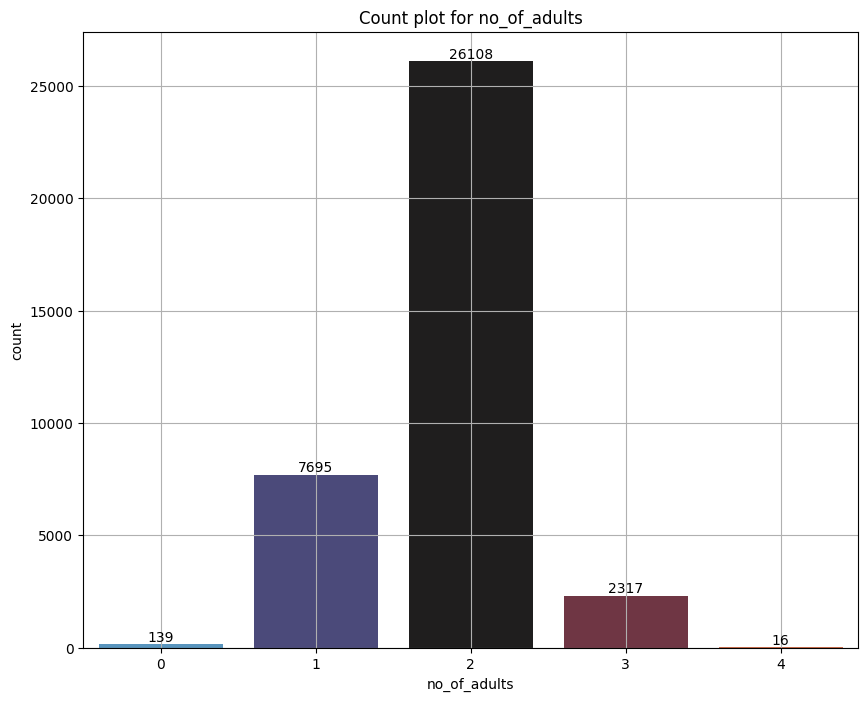

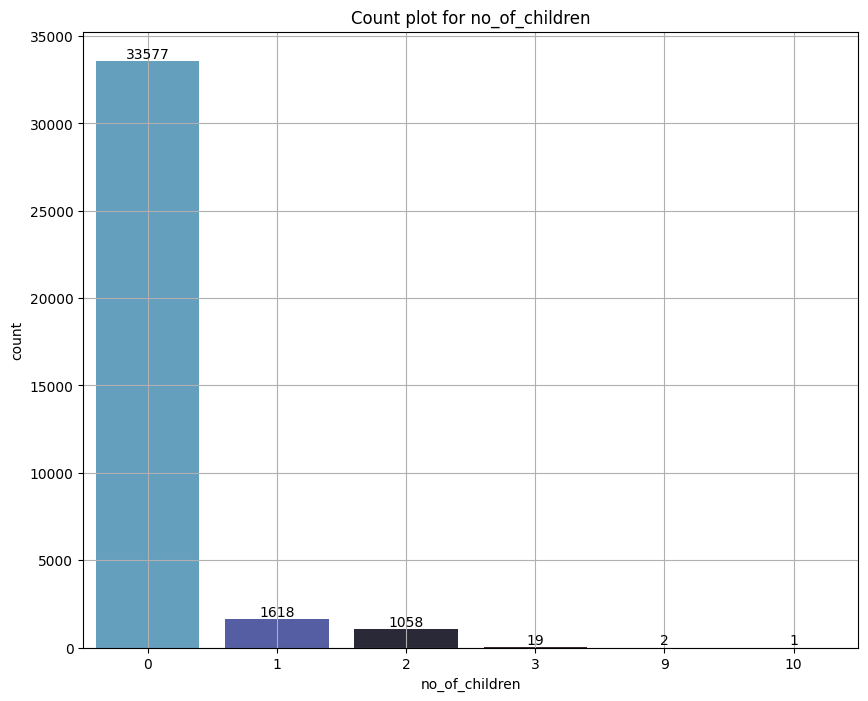

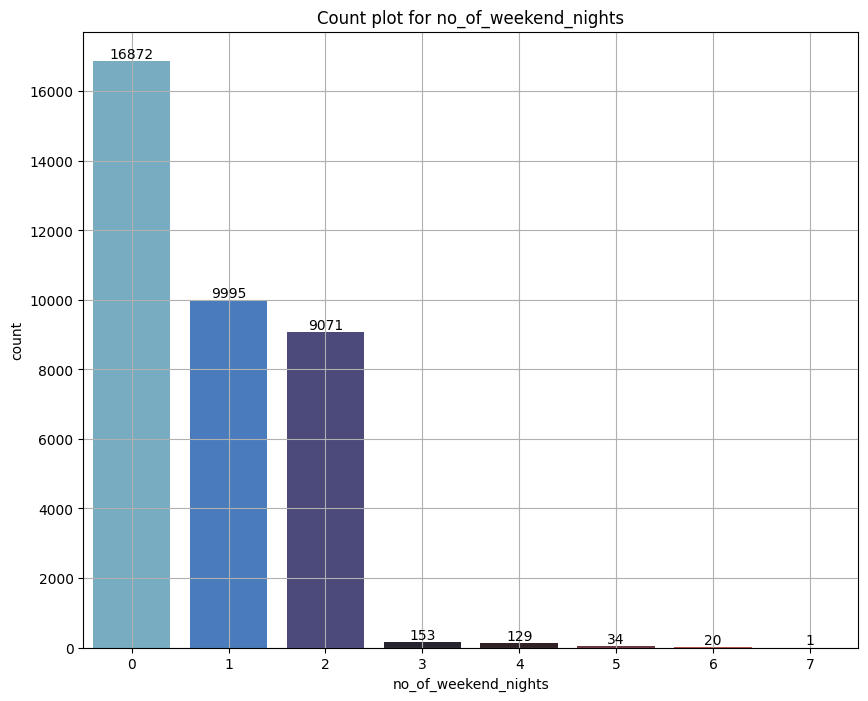

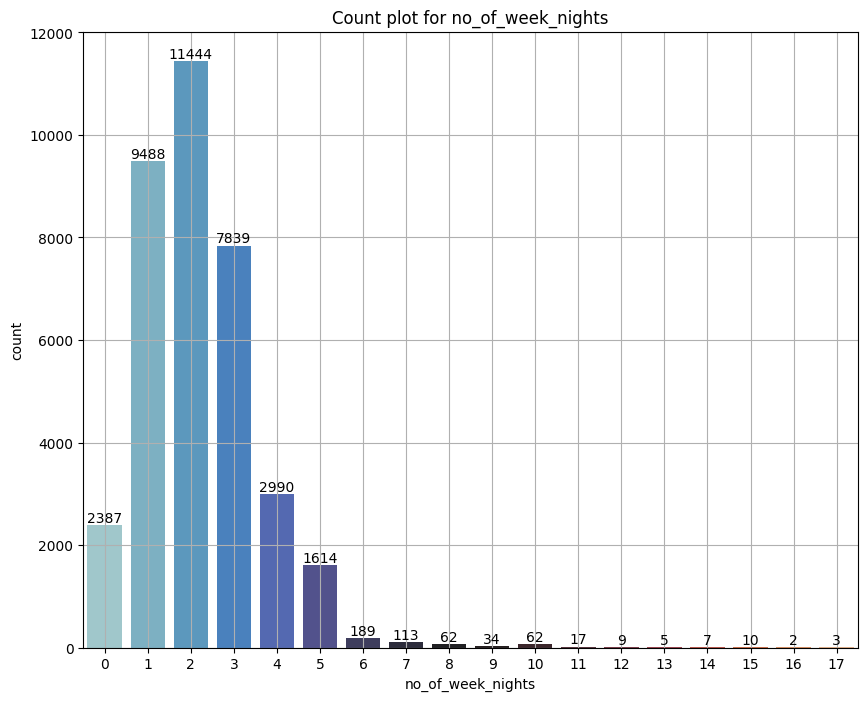

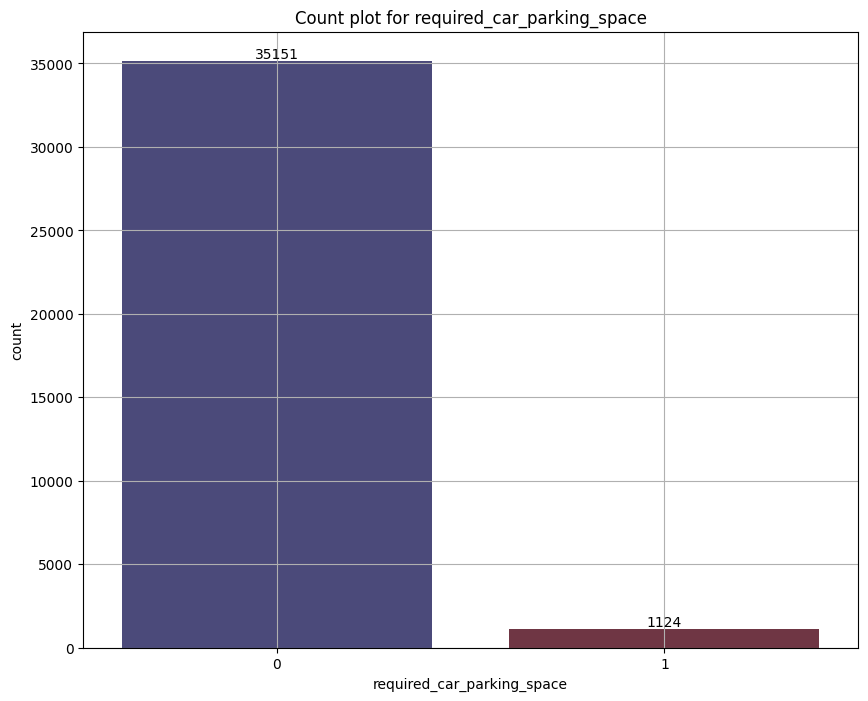

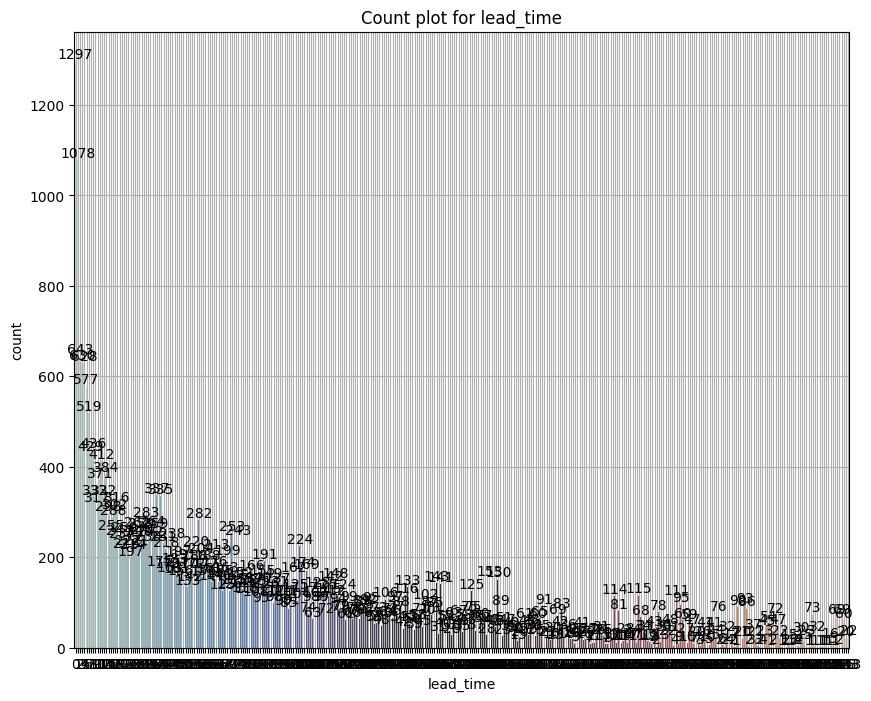

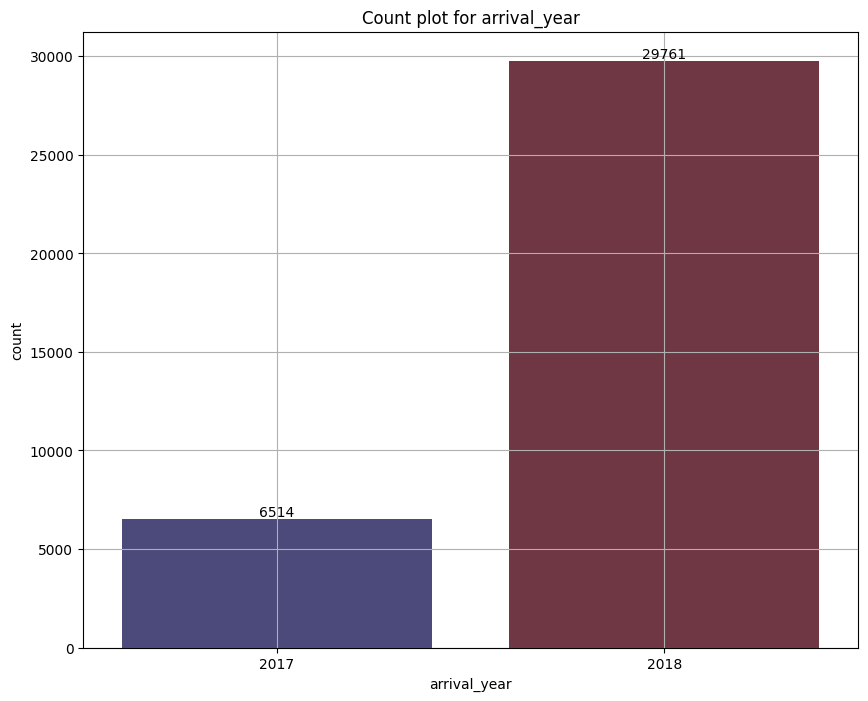

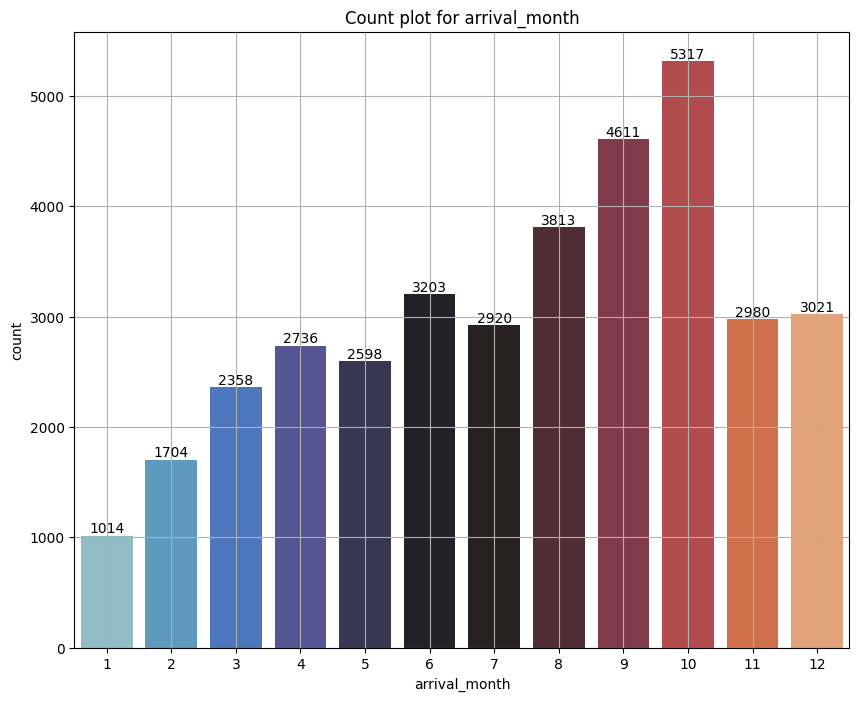

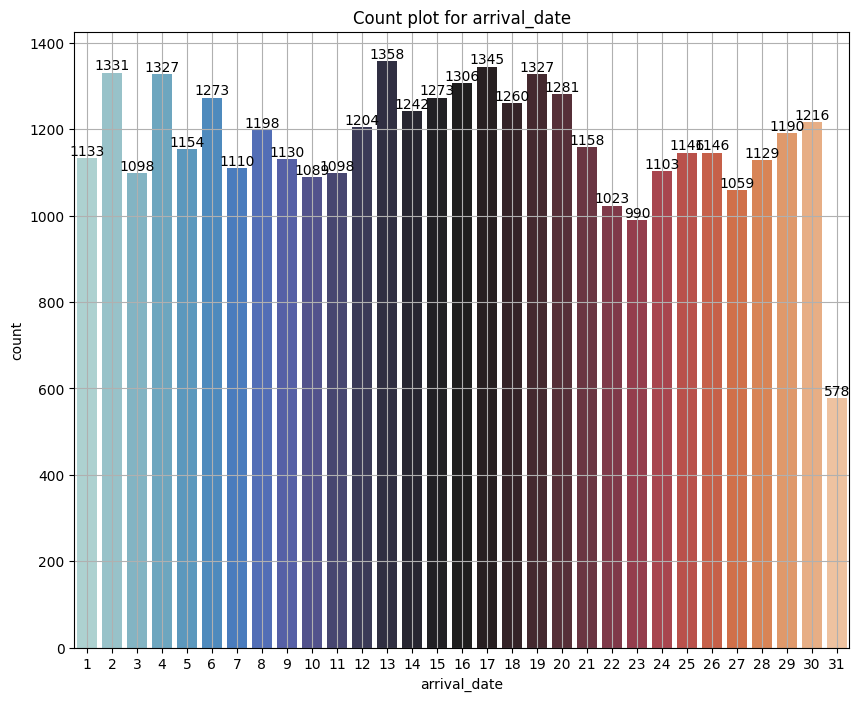

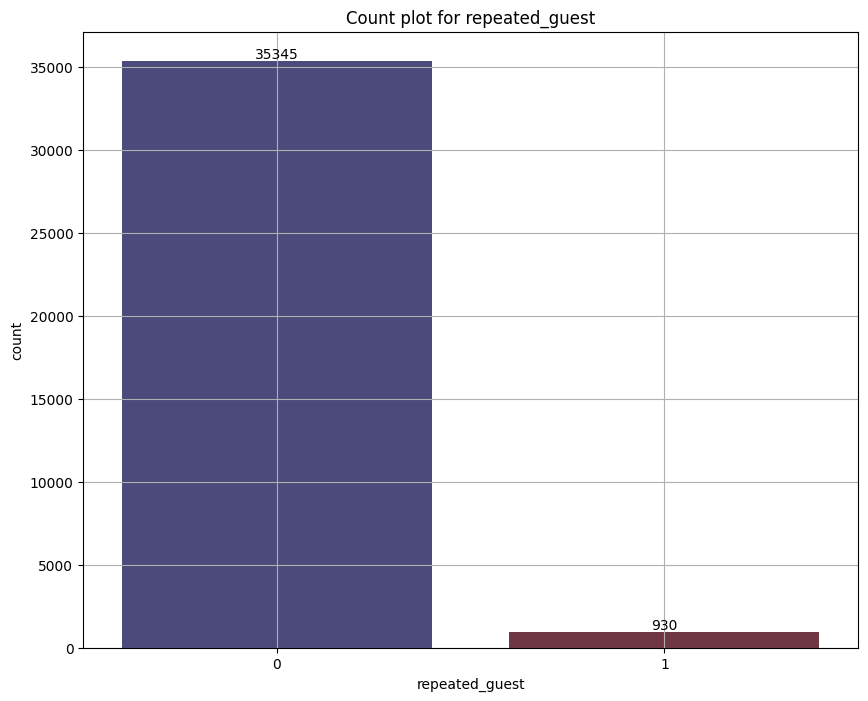

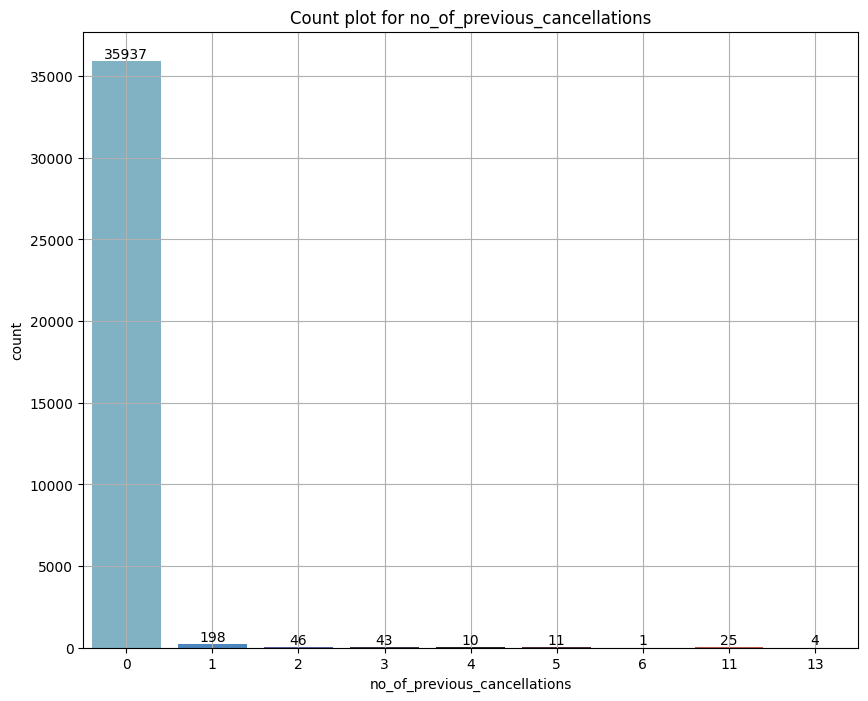

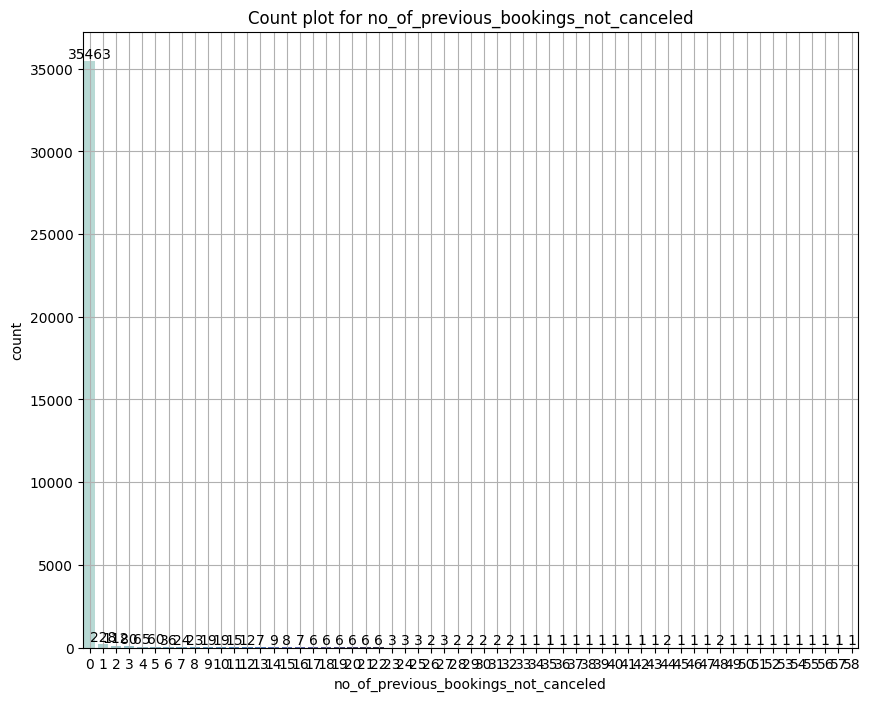

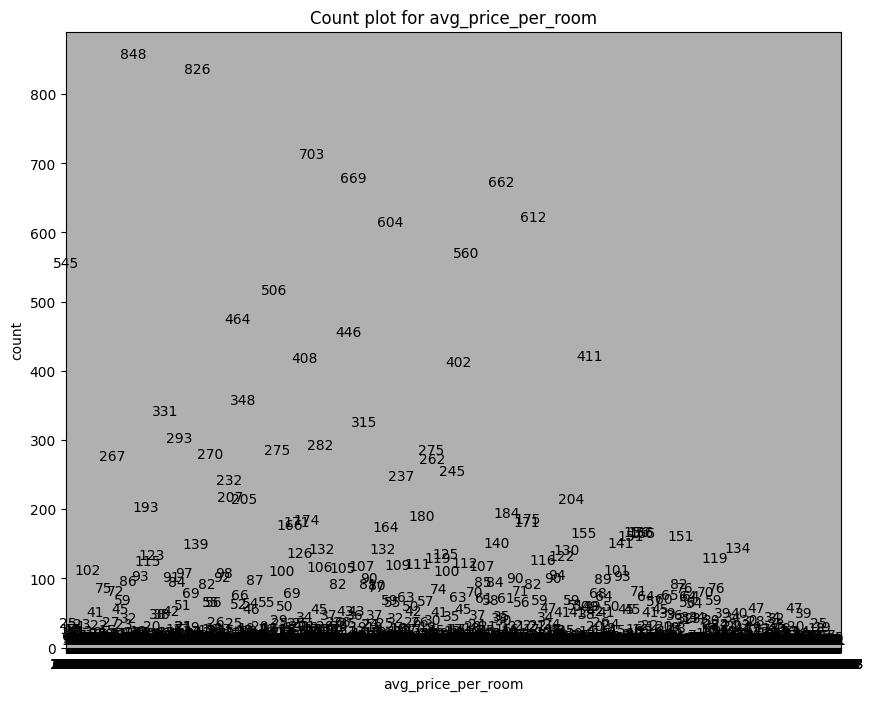

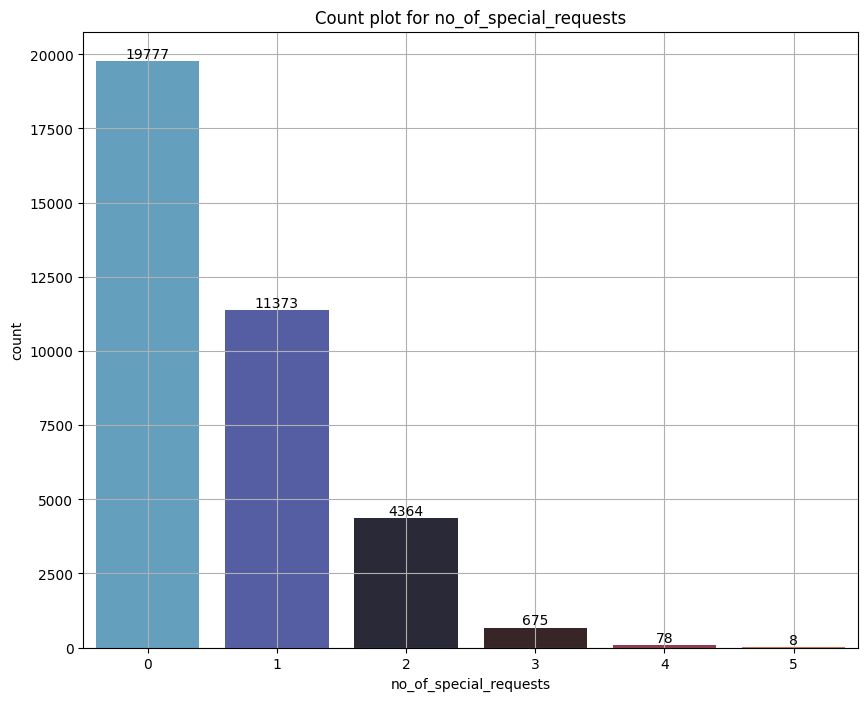

In [9]:
for col in num_cols:
    plt.figure(figsize=[10,8])
    ax = sns.countplot(data=df, x=col, palette='icefire')
    plt.bar_label(ax.containers[0])
    plt.title(f"Count plot for {col}")
    plt.grid()
    plt.show()

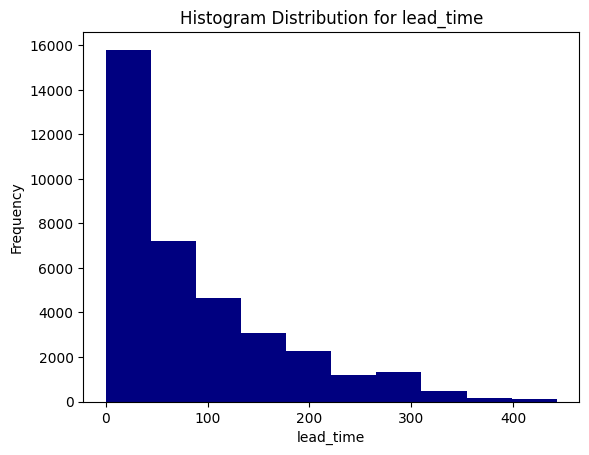

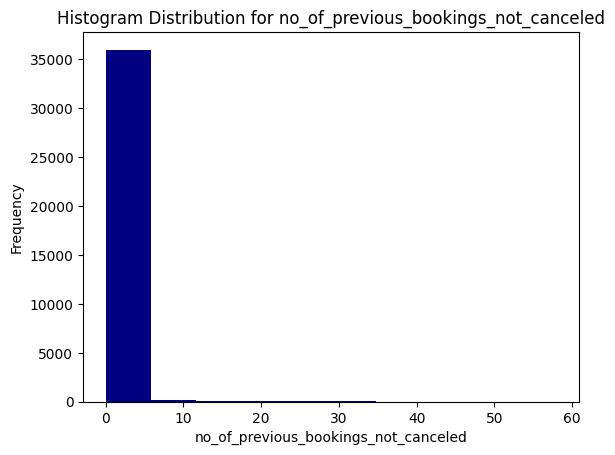

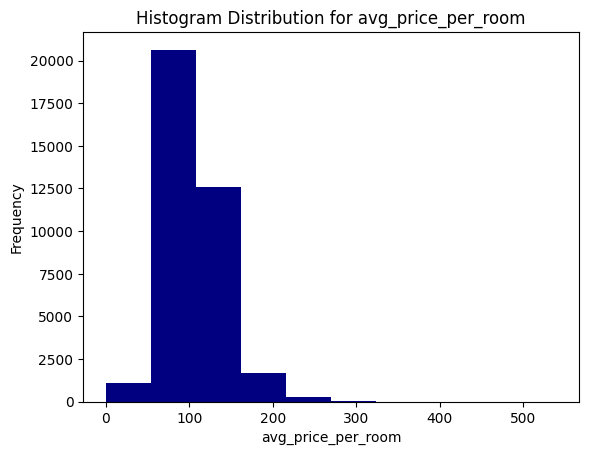

In [10]:
columns = ['lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']
for col in columns:
    plt.hist(df[col],color='navy')
    plt.title(f"Histogram Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

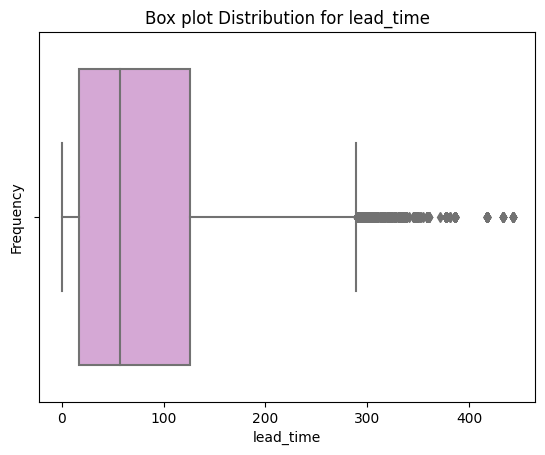

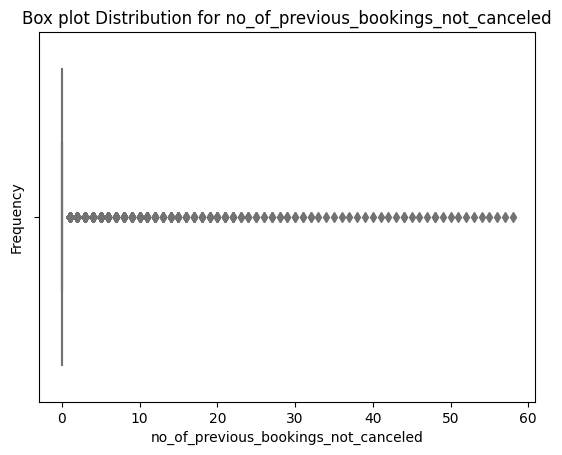

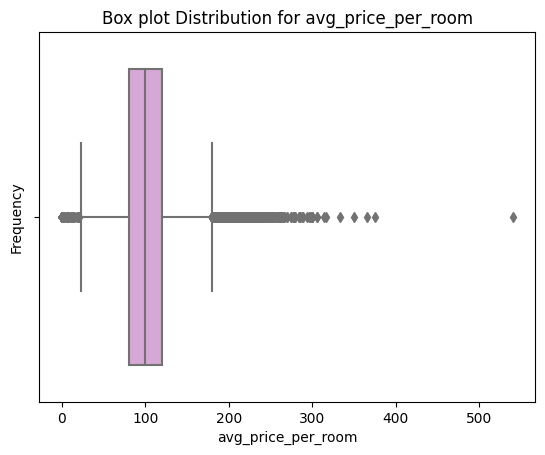

In [11]:
columns = ['lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']
for col in columns:
    sns.boxplot(data=df, x=col, color="plum")
    plt.title(f"Box plot Distribution for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### 2.2 Bi-variate Analysis

In [12]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df.groupby(by=['market_segment_type','booking_status'])['booking_status'].count()

market_segment_type  booking_status
Aviation             Canceled             37
                     Not_Canceled         88
Complementary        Not_Canceled        391
Corporate            Canceled            220
                     Not_Canceled       1797
Offline              Canceled           3153
                     Not_Canceled       7375
Online               Canceled           8475
                     Not_Canceled      14739
Name: booking_status, dtype: int64

In [14]:
df.groupby(by=['repeated_guest','booking_status'])['booking_status'].count()

repeated_guest  booking_status
0               Canceled          11869
                Not_Canceled      23476
1               Canceled             16
                Not_Canceled        914
Name: booking_status, dtype: int64

In [15]:
df.groupby(by=['no_of_special_requests','booking_status'])['booking_status'].count()

no_of_special_requests  booking_status
0                       Canceled           8545
                        Not_Canceled      11232
1                       Canceled           2703
                        Not_Canceled       8670
2                       Canceled            637
                        Not_Canceled       3727
3                       Not_Canceled        675
4                       Not_Canceled         78
5                       Not_Canceled          8
Name: booking_status, dtype: int64

In [16]:
df.groupby(by=['room_type_reserved','booking_status'])['booking_status'].count()

room_type_reserved  booking_status
Room_Type 1         Canceled           9072
                    Not_Canceled      19058
Room_Type 2         Canceled            228
                    Not_Canceled        464
Room_Type 3         Canceled              2
                    Not_Canceled          5
Room_Type 4         Canceled           2069
                    Not_Canceled       3988
Room_Type 5         Canceled             72
                    Not_Canceled        193
Room_Type 6         Canceled            406
                    Not_Canceled        560
Room_Type 7         Canceled             36
                    Not_Canceled        122
Name: booking_status, dtype: int64

In [17]:
df.groupby(by=['room_type_reserved'])['avg_price_per_room'].mean()

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64

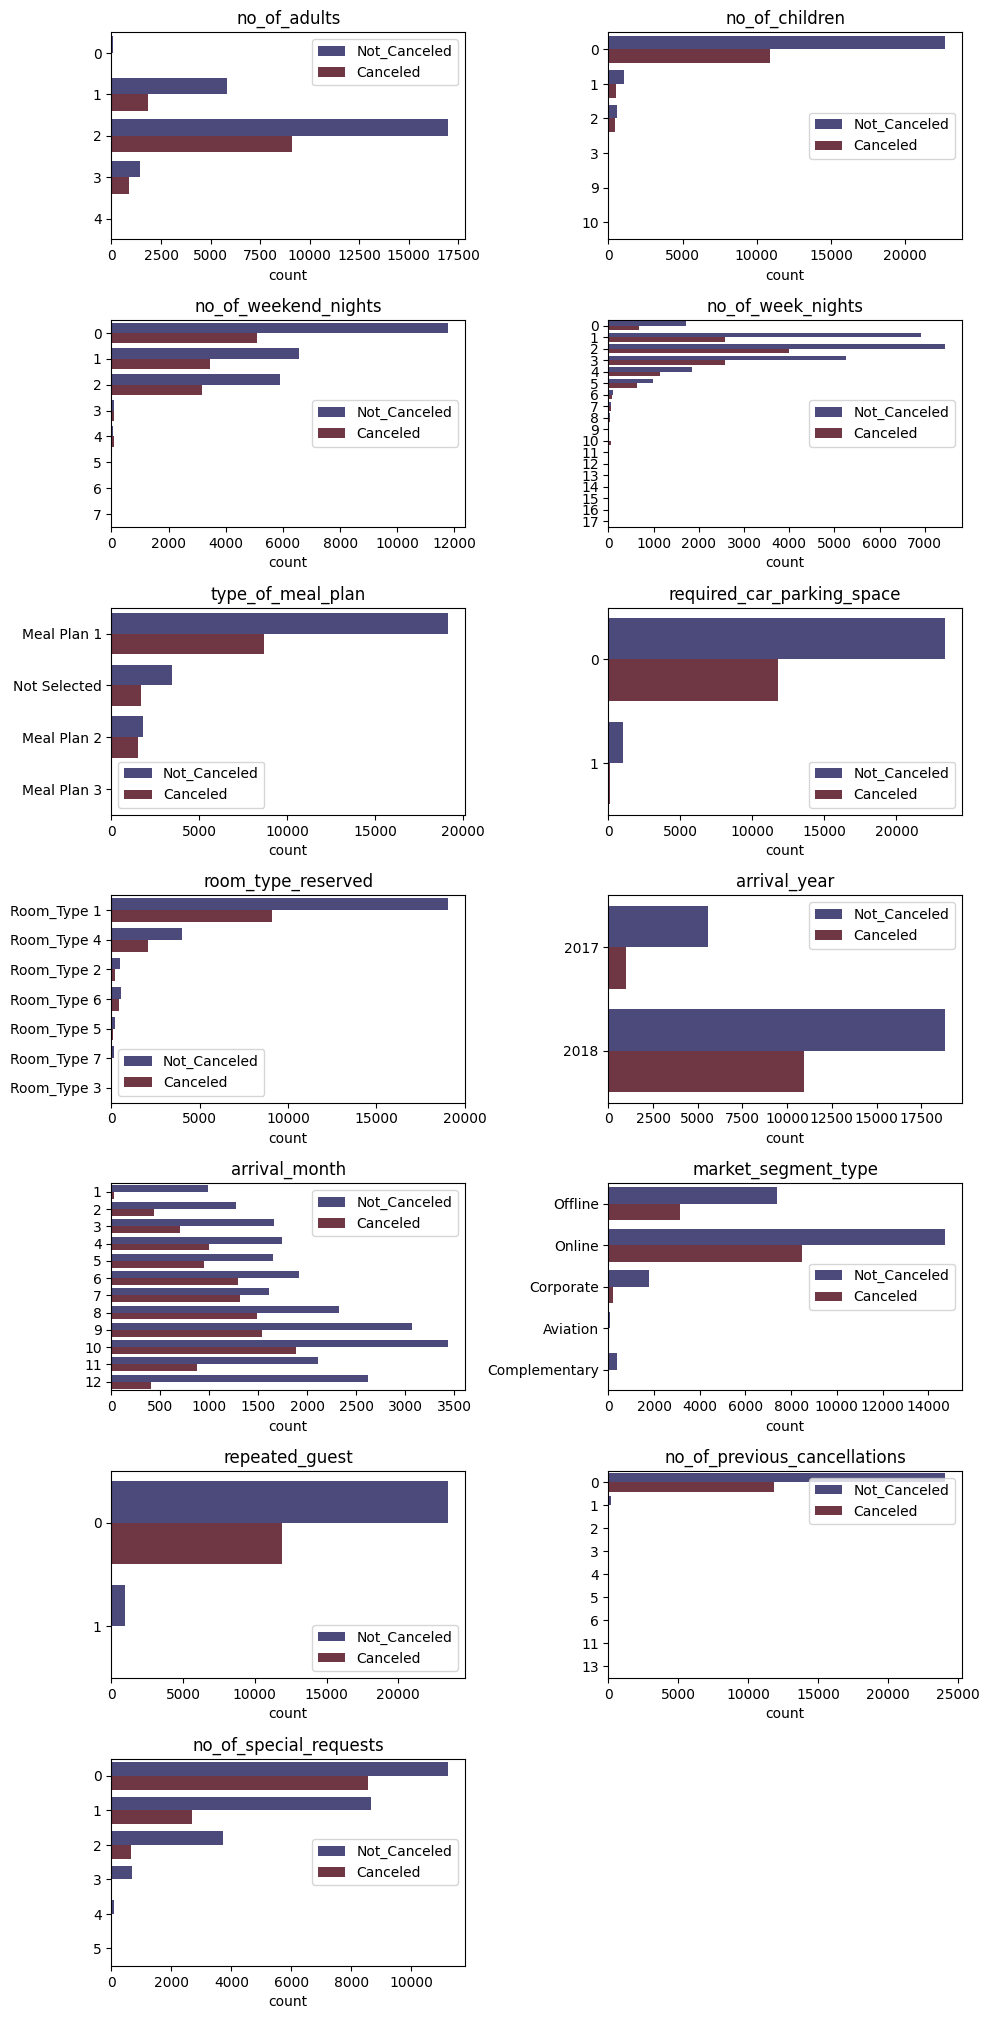

In [18]:
columns = ['no_of_adults','no_of_children','no_of_weekend_nights',
'no_of_week_nights','type_of_meal_plan','required_car_parking_space',
'room_type_reserved','arrival_year','arrival_month',
'market_segment_type','repeated_guest','no_of_previous_cancellations',
'no_of_special_requests']

plt.figure(figsize=(10,40))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.countplot(y=df[col], hue=df['booking_status'],palette='icefire')
    plt.title(col)
    plt.ylabel(None)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

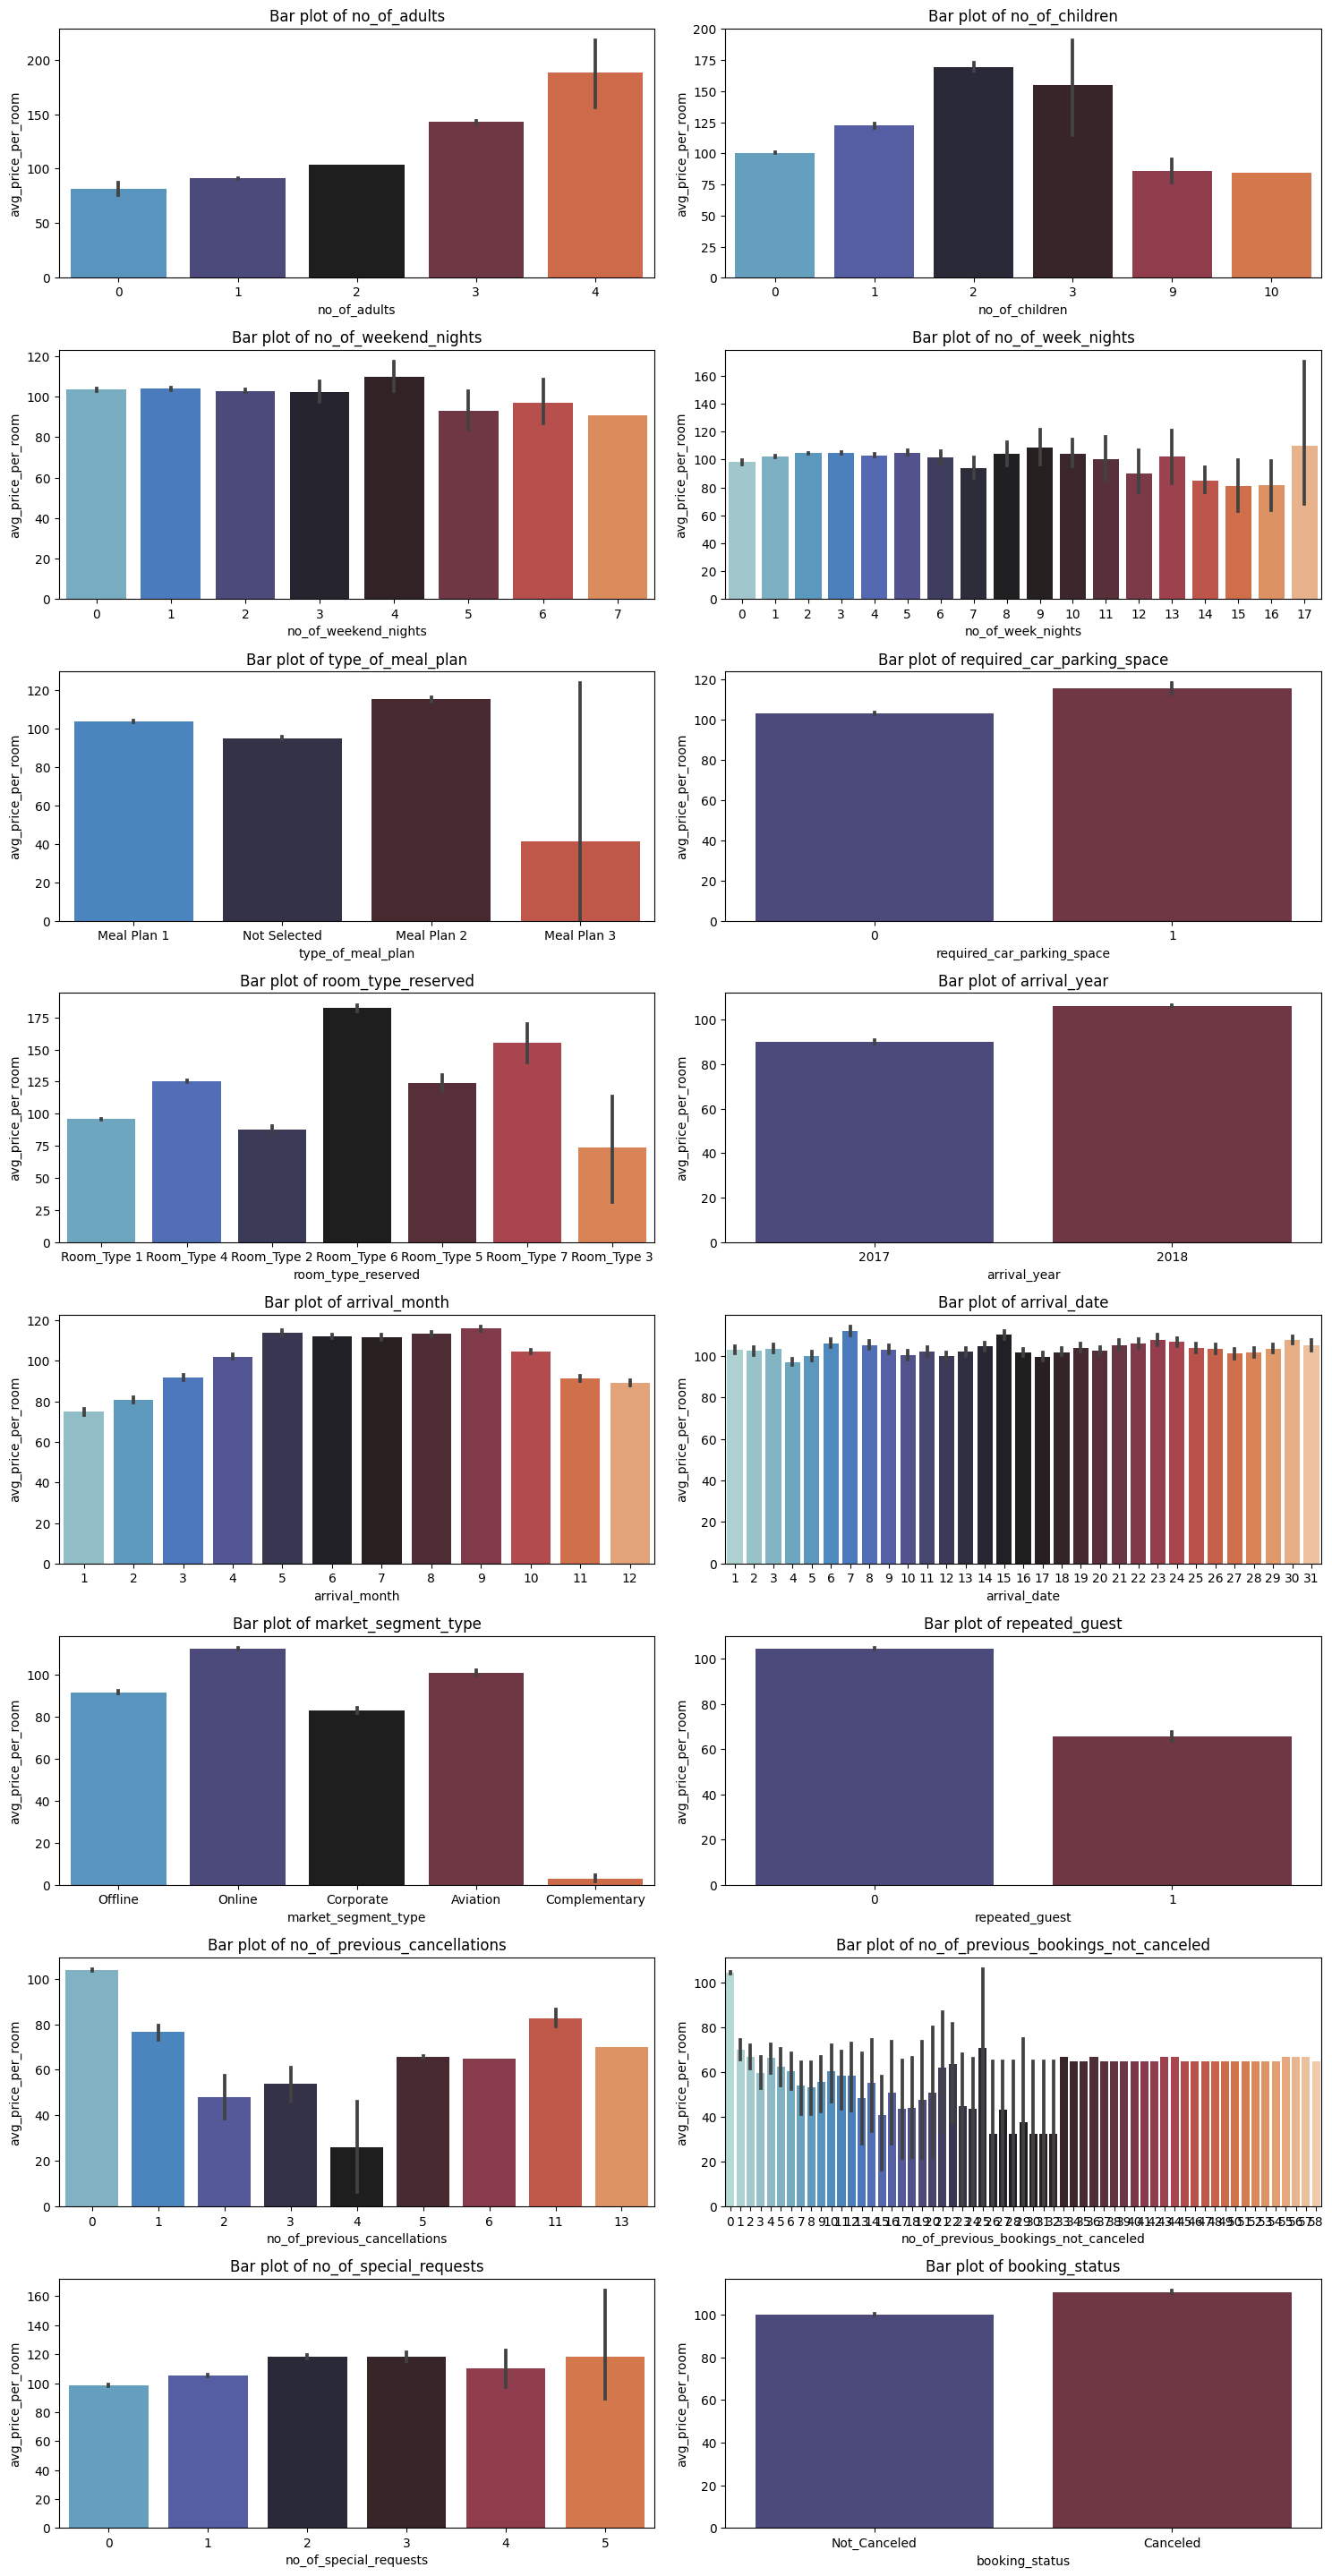

In [20]:
columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status']

plt.figure(figsize=(15,50))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.barplot(data=df,x=col,y="avg_price_per_room",palette='icefire')
    plt.title(f"Bar plot of {col}")
plt.tight_layout()
plt.show()

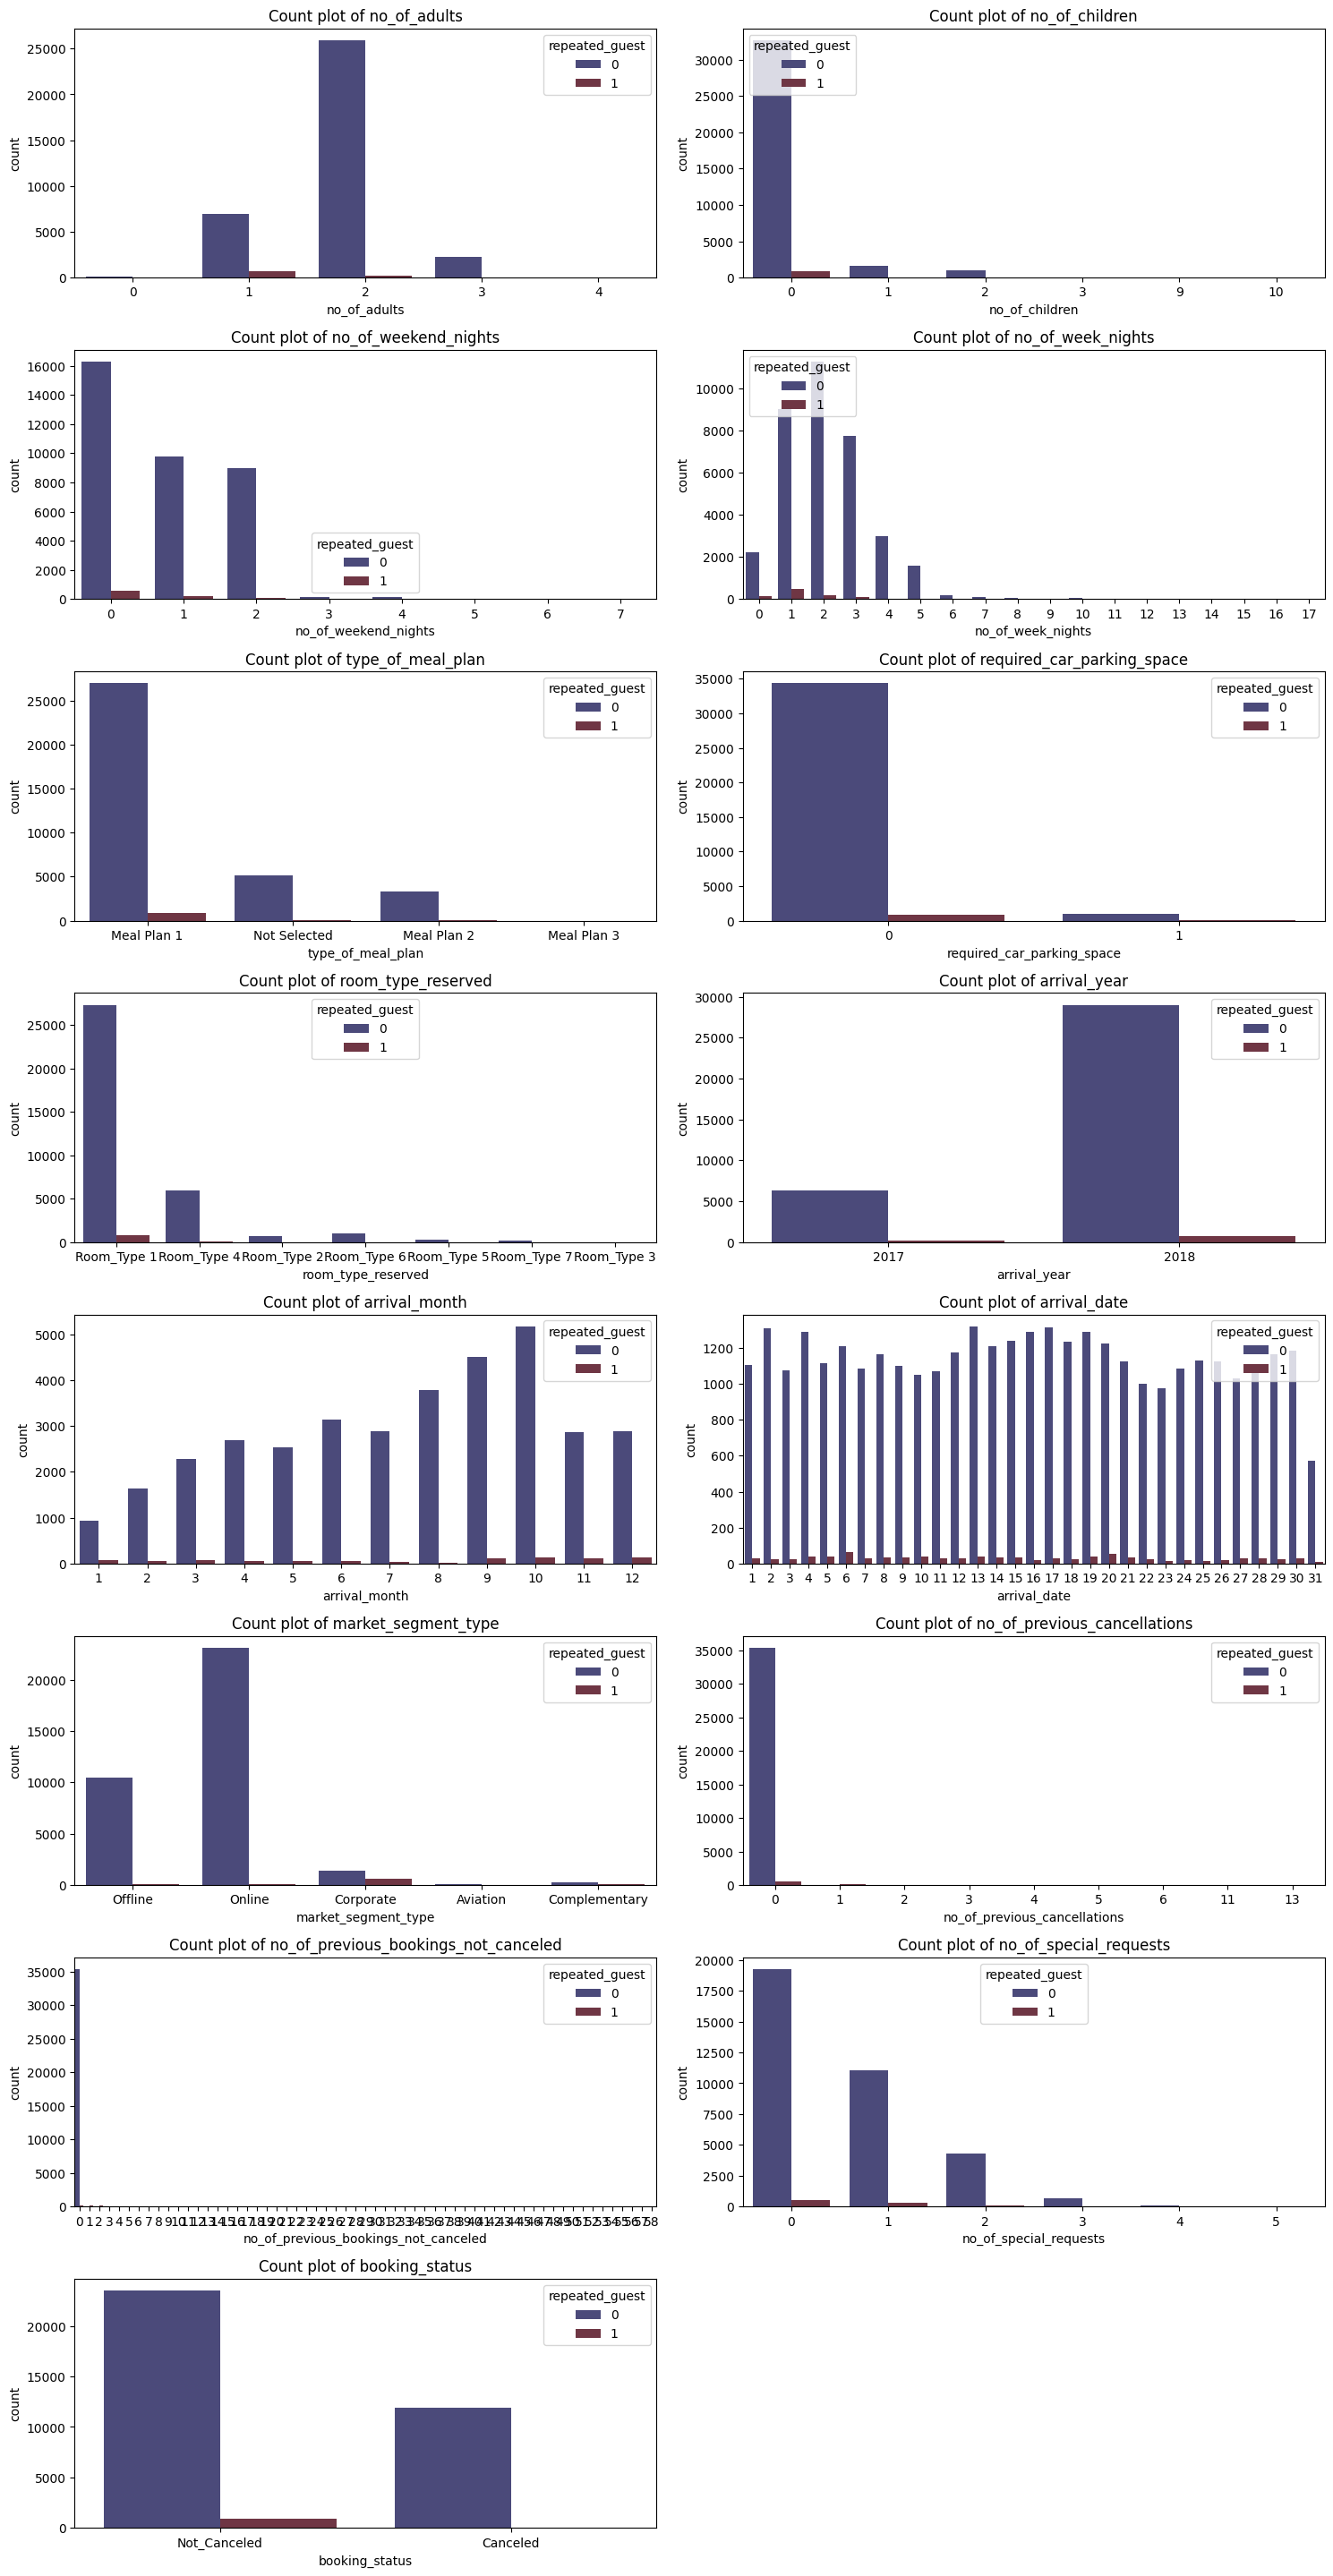

In [21]:
columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'no_of_previous_cancellations', 
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'booking_status']

plt.figure(figsize=(15,50))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.countplot(data=df,x=col,hue="repeated_guest",palette='icefire')
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

### **Observation**
* Many of the hotel customers adopted for Meal Plan 1 and Room type 1.
* Most them were from online market segment and made no concellations
* Most of the guests were adults came with 1 partner and no other childrens
* Majority of the guest stayed at hotel for a single nightin weekend, either Saturday or Sunday.
* Many guests stayed for two nights at hotel in week days.
* Majority of the guests needed no parking space.
* Most number of hotels booking were made in year 2018.
* Most of the hotel reservations were made in August, September, and October
* Many reservations were made on 2nd , 4th, 13th, 17th, & 19th date of month.
* Majority of the guests were arriving at hotel for the first time and have no previous cancellations on made no special requests.
* Major Cancellations of hotel reservation were Received from **online** market segment.
* Major cancellations of auto reservation were from Non repeated guests.
* Major cancellations of hotel reservations were from room type 1.
* Most expensive room type was room type 6 with an average price of 182 euros
* Meal plan two was most expensive for guest in their stay.
* Guest who reserved the hotel and arrived in September month had to pay more expense for stay at hotel

## 3. Feature Engineering

In [22]:
# Total guest
df['total_people'] = df['no_of_adults'] + df['no_of_children']

In [23]:
# Total duration of stay in days
df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

In [24]:
# Total Cost of stay
df['total_cost'] = df['total_nights']* df['avg_price_per_room']

In [25]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_people,total_nights,total_cost
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,Online,0,0,0,167.80,1,Not_Canceled,3,8,1342.40
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,Online,0,0,0,90.95,2,Canceled,2,4,363.80
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,Online,0,0,0,98.39,2,Not_Canceled,2,8,787.12
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,Online,0,0,0,94.50,0,Canceled,2,3,283.50
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,...,Offline,0,0,0,161.67,0,Not_Canceled,2,3,485.01


In [26]:
df_encoded = df.copy()

In [27]:
label_encoder = LabelEncoder()
labelling_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type', 'booking_status']
for col in labelling_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [28]:
df_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_people,total_nights,total_cost
0,INN00001,2,0,1,2,0,0,0,224,2017,...,3,0,0,0,65.00,0,1,2,3,195.0
1,INN00002,2,0,2,3,3,0,0,5,2018,...,4,0,0,0,106.68,1,1,2,5,533.4
2,INN00003,1,0,2,1,0,0,0,1,2018,...,4,0,0,0,60.00,0,0,1,3,180.0
3,INN00004,2,0,0,2,0,0,0,211,2018,...,4,0,0,0,100.00,0,0,2,2,200.0
4,INN00005,2,0,1,1,3,0,0,48,2018,...,4,0,0,0,94.50,0,0,2,2,189.0


In [29]:
df_encoded.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int32
total_people                              int64
total_nights                            

In [30]:
X = df_encoded.drop(['Booking_ID', 'booking_status'], axis=1)
y = df_encoded['booking_status'] # Target Variable

In [31]:
# Spliting the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9068, 20) (27207, 20) (9068,) (27207,)


## **Modelling**

### 3.1 Logistic Regression

In [32]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
print(f"Logistic regression model accuracy: {logreg_train_accuracy:.4f}")

Logistic regression model accuracy: 0.8032


### 3.2 Random Forest Model

In [33]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf.predict(X_train))
print(f"Random forest model accuracy: {rf_train_accuracy:.4f}")

Random forest model accuracy: 0.9960


### 3.3 XGBoost Model

In [34]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
print(f"XGBoost model accuracy: {xgb_train_accuracy:.4f}")

c:\Users\Piyush S More\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost model accuracy: 0.9519


#### We need to check overfitting based on performance of models on train and test data

In [35]:
# Calculate test accuracy for each model
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# Create a dataframe to hold the results
overfitting_check = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost' ],
    'Training Accuracy': [logreg_train_accuracy, rf_train_accuracy, xgb_train_accuracy],
    'Test Accuracy': [logreg_accuracy, rf_accuracy, xgb_accuracy]
})

overfitting_check['Difference'] = overfitting_check['Training Accuracy'] - overfitting_check['Test Accuracy']

overfitting_check

,Model,Training Accuracy,Test Accuracy,Difference
0,Logistic Regression,0.803154,0.801595,0.001559
1,Random Forest,0.996030,0.883743,0.112287
2,XGBoost,0.951919,0.880803,0.071116


**In summary:**

* The Random Forest model has the highest accuracy on the training data, but it seems to be overfitting and performs worse on the test data compared to the other models.
* The XGBoost model performs slightly worse on the training data but better on the test data, indicating that it generalizes better to new data.
* The Logistic Regression model performs similarly on both the training and test data, indicating good generalization, but its overall accuracy is lower than the XGBoost model.

## **Evaluation**

- Confusion Matrix

In [36]:
# Compute confusion matrix for the best performing model (XGBoost Model)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 6979  1986]
 [ 1257 16985]]


- Metrics

In [37]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8808
Precision: 0.8953
Recall: 0.9311
F1 Score: 0.9129
